<a href="https://colab.research.google.com/github/uttam112/sprinklr/blob/main/Chunking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Transformers and Langchain

In [ ]:
!pip install transformers
!pip install langchain

#Function for splitting text into chunks

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import GPT2TokenizerFast

In [ ]:
#Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))


"""
This will split documents recursively by different characters - starting with "\n\n", then "\n", then " ".
This is nice because it will try to keep all the semantically relevant content in the same place for as long as possible.
"""

text_splitter = RecursiveCharacterTextSplitter(
    # separators =['\n'],
    chunk_size = 1000,               #chunk size of each document
    chunk_overlap  = 200,            #An overlap from previous document to have some context
    length_function = count_tokens,  #there is also a default length_function -> can remove this line
)

#Loading the documents and creating chunks

In [ ]:
chunks = []
for i in range(16):
  filename = "/content/drive/MyDrive/dataset/purified/context"+str(i)+".txt"         #change according to your file path
  text_file = open(filename, "r")
  #read whole file to a string
  data = text_file.read()
  chunks = chunks + text_splitter.create_documents([data])

#================================================for debugging purpose===========================================================
# text_file = open("context1.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks = text_splitter.create_documents([data])

# text_file = open("context2.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks2 = text_splitter.create_documents([data])

# text_file = open("context3.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks3 = text_splitter.create_documents([data])

# text_file = open("context4.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks4 = text_splitter.create_documents([data])

# text_file = open("context5.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks5 = text_splitter.create_documents([data])

# text_file = open("context6.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks6 = text_splitter.create_documents([data])

# text_file = open("context7.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks7 = text_splitter.create_documents([data])

# text_file = open("context8.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks8 = text_splitter.create_documents([data])


# text_file = open("context9.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks9 = text_splitter.create_documents([data])

# text_file = open("context10.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks10 = text_splitter.create_documents([data])

# text_file = open("context11.txt", "r")
# #read whole file to a string
# data = text_file.read()
# chunks11 = text_splitter.create_documents([data])

# chunks = chunks  + chunks2 + chunks3 + chunks4 + chunks5 + chunks6 + chunks7 + chunks8 + chunks9 + chunks10 + chunks11

# Visualization of Token count in each Chunk

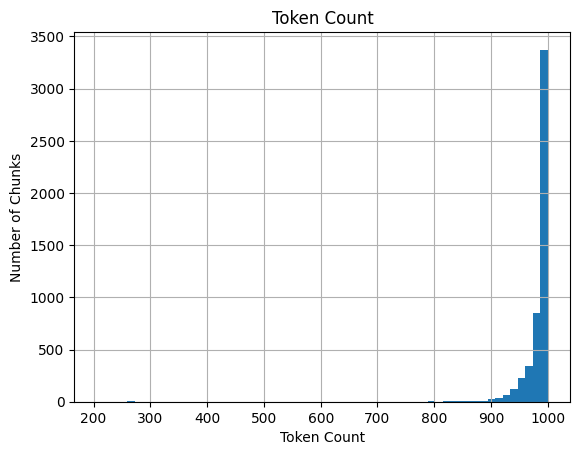

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]

df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
df.hist(bins=60, )

plt.xlabel("Token Count")
plt.ylabel("Number of Chunks")


# Show the plot
plt.show()

#Huggingface embeddings/Sentence Transformer Embeddings

In [ ]:
!pip install sentence_transformers

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

In [ ]:
!pip install faiss-cpu

In [ ]:
from langchain.vectorstores import FAISS
db = FAISS.from_documents(chunks, embeddings)

#Merge two FAISS objects

In [ ]:
def merge(db,db1):
        """Merge another FAISS object with the current one.

        Add the target FAISS to the current one.

        Args:
            target: FAISS object you wish to merge into the current one

        Returns:
            None.
        """
        db.merge_from(db1)
        return db

#Saving the embeddings in Google Drive

In [ ]:
import pickle
with open("/content/drive/MyDrive/Embeddings/rpurified_only_Sprinklr1000_200.pkl", "wb") as f:
    pickle.dump(db,f)

In [ ]:
#loading it from drive
import pickle
with open("/content/drive/MyDrive/Embeddings/purified_only_Sprinklr1000_200.pkl", "rb") as f:
    db = pickle.load(f)

In [ ]:
docs = db._similarity_search_with_relevance_scores("How many companies use sprinklr?", k = 6) #k = number of documents to be retrieved

In [ ]:
print(docs[0][0].page_content)